In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [38]:
file = open('VST.dat','r') 
 
TrayV=file.readlines() 

file.close() 


##CONSTANTS
###############################################

#constants
cosa1=1001
points_x=cosa1
points_t=4*int(int(points_x**2 /50)/4.0) #para quesea multiplo de 4
DD=-20
steps=int(cosa1*5)
hbar=1.0
m=1.0
W=10.0 #size of the well
d=0.5
cent=-0.0


# create grid
tf=100
W=W/2.0
xf=W
x0=-W
dt=tf/points_t
dx=(xf-x0)/(points_x)
x=np.linspace(x0,xf,points_x) #debe tener un numero impar de elemntos para que sirva NInteg
t=np.linspace(0,tf,points_t)


In [39]:
defV=np.array([TrayV[i][0:-1].split(',') for i in range(points_t)], dtype=np.float).T


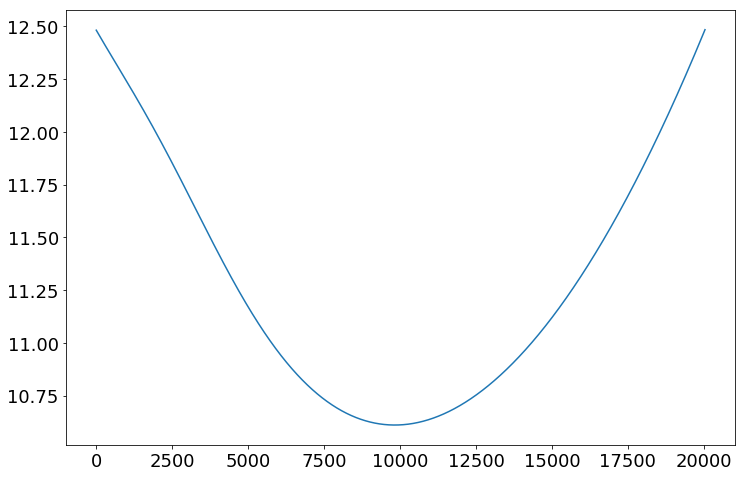

In [49]:
plot(defV.T[:,0])

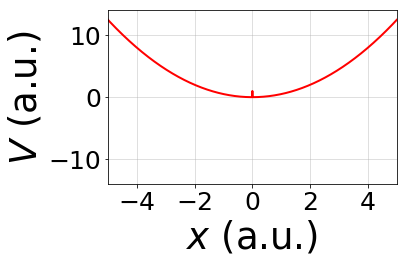

In [51]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.html.widgets import *

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-5,5))
ax.set_ylim((-14,14))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel("$V$ (a.u.)",size=37)
ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                
plt.tight_layout()



line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line10, = ax.plot([], [], lw=2, c='r')



# initialization function: plot the background of each frame
def init():
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    x10 = x
    #y10 = defV[:,i]+1000*(np.sign(-TrayX[:,i]+TrayX[0,i])+1)+1000*(np.sign(TrayX[:,i]-TrayX[-1,i])+1)
    y10 = defV[:,50*i]
    
    line10.set_data(x10, y10)
    
   
    
    
    return(line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=40, blit=True)
HTML(anim.to_html5_video())




In [52]:

anim.save('animationSTA.gif', writer='imagemagick', fps=15)